<a href="https://colab.research.google.com/github/jopachecoc/AD_1_preguntasmart/blob/main/Analisis_bivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

taller 2 analisis univariado
Problema: se desea conocer que es mejor, invertir en el SPY o en un CDT a 4 años?

Pregunta smart: que es mas rentable En un plazo de 4 años, invertir 20 millones de pesos en el SPY o en un CDT si tenemos en cuenta que la taza del CDT es de 9% efectivo anual?

Importancia de la columna:
Tomamos la informacion de un etf (SPY) de la siguiente URL: https://finance.yahoo.com/quote/SPY/history/?period1=728317800&period2=1723227557 La columna a analizar es el comportamiento historico del ETF SPY (close) que esta basado en el SYP500 el cual es un conjunto de acciones de las mejores 500 empresas de EEUU. necesitamos saber el comportamiento de cierre de la accion diaria para poder deducir que es mejor a largo plazo invertir en este o colocar el dinero en un CDT a un plazo de 4 años.

In [ ]:
!pip install dfply

In [17]:
#from google.colab import drive # conect with my drive
#drive.mount('/content/drive') # know all of files
import numpy as np
import pandas as pd
file_path = "https://raw.githubusercontent.com/jopachecoc/AD_1_preguntasmart/main/SPY.csv"
df = pd.read_csv(file_path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,24.684105,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,24.859661,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,24.912321,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.175692,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.281015,531500


In [18]:
#cargamos los datos.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from dfply import *
import numpy as np

df['Date'] = pd.to_datetime(df['Date'])
# Extraer el año
df['año'] = df['Date'].dt.year
# Extraer el mes
df['mes'] = df['Date'].dt.month
df['añi'] = df['año'].astype('category')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7939 non-null   datetime64[ns]
 1   Open       7939 non-null   float64       
 2   High       7939 non-null   float64       
 3   Low        7939 non-null   float64       
 4   Close      7939 non-null   float64       
 5   Adj Close  7939 non-null   float64       
 6   Volume     7939 non-null   int64         
 7   año        7939 non-null   int32         
 8   mes        7939 non-null   int32         
 9   añi        7939 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(5), int32(2), int64(1)
memory usage: 505.0 KB


#Primer criterio de evaluación

Tenemos dos variables de interes las cuales vamos a analizar:

 1 es el valor de cierre del indicador (Close)

 2 el valor del volumen el cual equivale al volumen negociado en el dia (volume)

 Son de importancia ya el valor de la indice es lo que se desea predecir ademas en la unica informacion  con la que se cuenta, por otro lado esta el volumen negociado en el dia, el cual no necesariamente puede que sea o no usado en el pronostico del indice pero si nos puede dar insides hacerca de algun comportamiento o correlacion versus el valor de del indice.



In [20]:
# correlacion de pearson
correlation = df['Close'].corr(df['Volume'])
print(f'Correlación de Pearson entre x y y: {correlation}')

Correlación de Pearson entre x y y: 0.0664179036427274


Text(0, 0.5, 'volume')

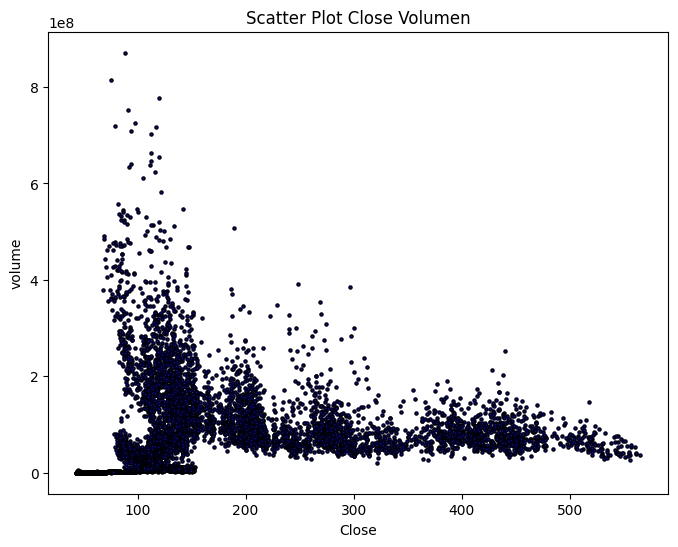

In [21]:
# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Close'], df['Volume'], color='blue',s=5, label='Data points', edgecolor='k')

# Añadir título y etiquetas
plt.title('Scatter Plot Close Volumen')
plt.xlabel('Close')
plt.ylabel('volume')

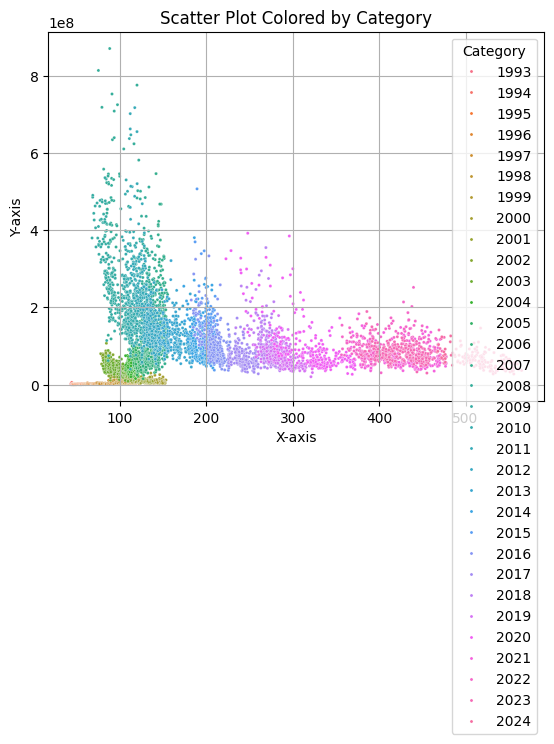

In [23]:
sns.scatterplot(data=df, x='Close', y='Volume', hue='añi',s=5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot Colored by Category')
plt.legend(title='Category')
plt.grid(True)
plt.show()

<ipython-input-25-a0336b598272>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['añi'] = dff['año'].astype('category')
<ipython-input-25-a0336b598272>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['mes'] = dff['mes'].astype('category')


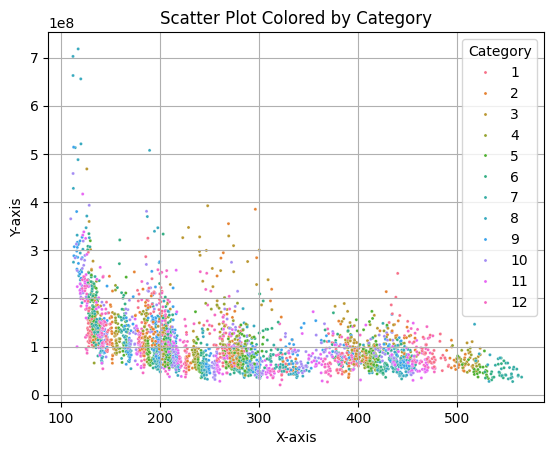

In [25]:
# los ultimos años
dff = df[df['año']>2010]
dff['añi'] = dff['año'].astype('category')
dff['mes'] = dff['mes'].astype('category')

sns.scatterplot(data=dff, x='Close', y='Volume', hue='mes',s=5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot Colored by Category')
plt.legend(title='Category')
plt.grid(True)
plt.show()

# el comportamiento de cada uno de los años es similar al de toda la serie global ya que para valores bajos del indice
# tienen mas volatilidad en volumen negociado diario versus los valores altos de la accion. y no se evidencia una
# correlacion lineal ni positiva ni negativa entre las dos variables.

In [26]:
from scipy.stats import spearmanr
corrsper = spearmanr(df['Close'], df['Volume'])
corrsper

SignificanceResult(statistic=0.4549050010418863, pvalue=0.0)

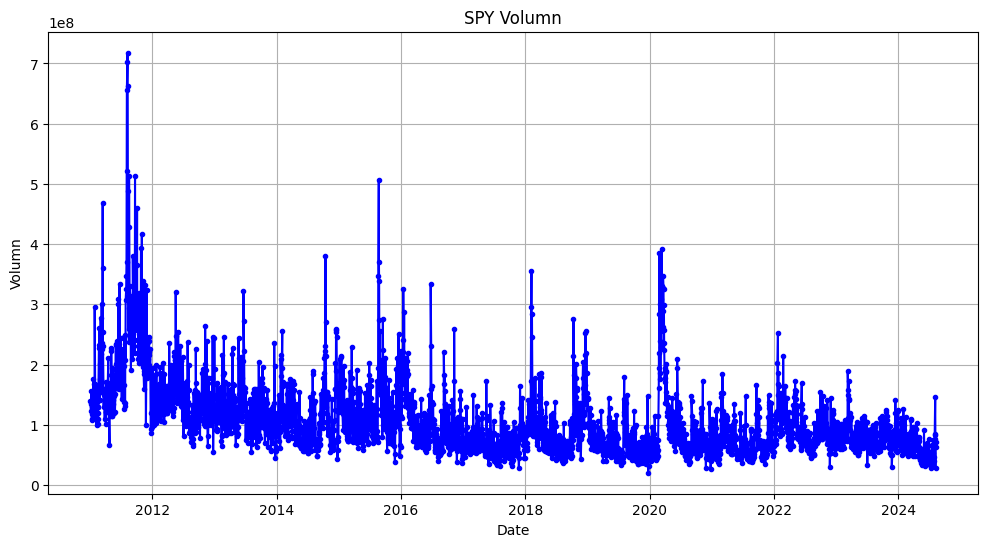

In [27]:
# grafico de volumen solo
plt.figure(figsize=(12, 6))
plt.plot(dff.Date, dff['Volume'], marker='.', linestyle='-', color='b')

# Add titles and labels
plt.title('SPY Volumn')
plt.xlabel('Date')
plt.ylabel('Volumn')
plt.grid(True)

# Show the plot
plt.show()

#conclusiones
Vemos que no hay evidencia de una correlacion lineal entre las dos variables.
sim embargo para ser realista no creo que nos genere informacion de valor para la estrategia, el comportamiento de Volumen negociado parece ser ser aleatorio y sin relacion significativa sobre la varibale del valor de la indice, lo mas seguro es que para una estimacion del modelo para preecir el precio, de seguro solo se use la informacion de historica del indice.



